# **Import & Load Dataset**

In [2]:
#import libarires required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#reading our excel file
df=pd.read_excel("Apples_stock price dataset.xlsx" , sheet_name="Sheet1")

In [4]:
# df

In [5]:
# Cleaning the column names
df.columns = [c.strip().lower() for c in df.columns]

In [6]:
# # checking the basic info
# print("Shape:",df.shape)

In [7]:
# print("Columns:", df.columns.tolist())

In [8]:
# df.info()

In [9]:
# df.describe()

The column counts are not consistent up to 100,000, with several columns having fewer entries. This indicates the presence of missing values in the dataset.

# **Parse DateTime & Set Index**

In [10]:
#converting the timestamp column into a actual datatime objects which might be in string/ text format
df['timestamp']=pd.to_datetime(df['timestamp'],errors='coerce')

In [11]:
#droping rows with invalid timestamps
df.dropna(subset=['timestamp']).sort_values('timestamp')

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
0,2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
1,2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2,2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
3,2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
...,...,...,...,...,...,...,...,...
99995,2021-05-29 11:00:00,498.719645,507952.135502,200804.699078,3.824464,3.620599,3.323797,-0.161068
99996,2021-05-29 12:00:00,497.035439,507943.811002,200807.796915,1.753618,4.904652,2.723226,0.170113
99997,2021-05-29 13:00:00,501.968810,507932.520304,200809.969048,2.423570,4.993412,1.677252,-0.479887
99998,2021-05-29 14:00:00,498.905984,507942.053787,200807.345521,2.787465,5.861924,1.075077,0.401896


In [12]:
#makes the timestamp column to index of dataset
df.set_index('timestamp', inplace=True)

In [13]:
# df.head()

# **Keep only 4:00 AM to 8:00 PM ET (and exclude weekends)**

In [14]:
# Keeping only time between 04:00 and 20:00
df = df.between_time('04:00', '20:00')

In [15]:
# Removing Saturdays and Sundays
df = df[df.index.dayofweek < 5]  #making mon=0 , tue=1, wed=2, thur=3, fri=4 , sat=5, sun=6

In [16]:
# df.head(48)

In [17]:
# #after filtering required columns which are only from 4am to 8pm everyday in dataset excling the saturday and sunday
# df.shape

In [18]:
# df.describe()

After filtering the dataset to include only the records between **4:00 AM and 8:00 PM** each day, and excluding Saturdays and Sundays to match actual U.S. stock market trading hours, the dataset was reduced from **100,000 rows to 50,592 rows.**

# **Handle Missing Values (Blanks)**

In [19]:
#counting missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
stock_price          18
nasdaq_index          4
sp500_index           3
inflation_rate        4
unemployment_rate     4
interest_rate         0
market_sentiment      0
dtype: int64


Filling numeric columns logically for
stock_price ,
nasdaq_index ,
sp500_index .

Economic indicators change slowly use forward fill for inflation_rate , unemployement_rate , interest rate .

Market sentiment column can fluctuate  use mean imputation

In [20]:
# #checking exactly which row has missing values
# df[df.isna().any(axis=1)]


### 1. Filling missing values Time-based interpolation for stock and market
for columns stock_price , nasdaq_index , sp500_index.
Fills missing values by estimating what the value should have been at that timestamp, based on nearby known values.

In [21]:
# Filling stock_price columns logically
df['stock_price'] = df['stock_price'].interpolate(method='time')

In [22]:
#checking the stock_price column is filled or not
df.loc[['2010-01-07 10:00:00','2010-01-11 10:00:00']]

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-07 10:00:00,104.685611,8768.181024,3187.264699,3.194932,6.441483,1.798886,0.260181
2010-01-11 10:00:00,112.746225,9346.414410,3412.887953,3.416334,4.827741,1.682058,-0.367913


Here the stock_price are successfully filled by interpolation

In [23]:
#similarly for nasdaq_index and sp500_index
df['nasdaq_index'] = df['nasdaq_index'].interpolate(method='time')
df['sp500_index'] = df['sp500_index'].interpolate(method='time')

### 2. Forward fill for slow-moving economic indicators
for columns inflation_rate , unemployement_rate , interest_rate.
Forward fill (ffill) replaces missing values with the last known valid value.

In [24]:
df['inflation_rate'] = df['inflation_rate'].fillna(method='ffill')
df['unemployment_rate'] = df['unemployment_rate'].fillna(method='ffill')
df['interest_rate'] = df['interest_rate'].fillna(method='ffill')


C:\Users\Sahil\AppData\Local\Temp\ipykernel_3604\3965981533.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['inflation_rate'] = df['inflation_rate'].fillna(method='ffill')
C:\Users\Sahil\AppData\Local\Temp\ipykernel_3604\3965981533.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['unemployment_rate'] = df['unemployment_rate'].fillna(method='ffill')
C:\Users\Sahil\AppData\Local\Temp\ipykernel_3604\3965981533.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['interest_rate'] = df['interest_rate'].fillna(method='ffill')


### 3. Mean imputation for market sentiment

for market_sentiment column
Replaces missing sentiment values with the average sentiment score across the dataset.

In [25]:
df['market_sentiment'] = df['market_sentiment'].fillna(df['market_sentiment'].mean())


In [26]:
#recheck wheather the all columns missing values are filled or not
df.isnull().sum()

stock_price          0
nasdaq_index         0
sp500_index          0
inflation_rate       0
unemployment_rate    0
interest_rate        0
market_sentiment     0
dtype: int64

Successfully all the columns blanks has been filled ...

In [27]:
# df.describe()

# **Handle Outliers (Don’t Drop)**

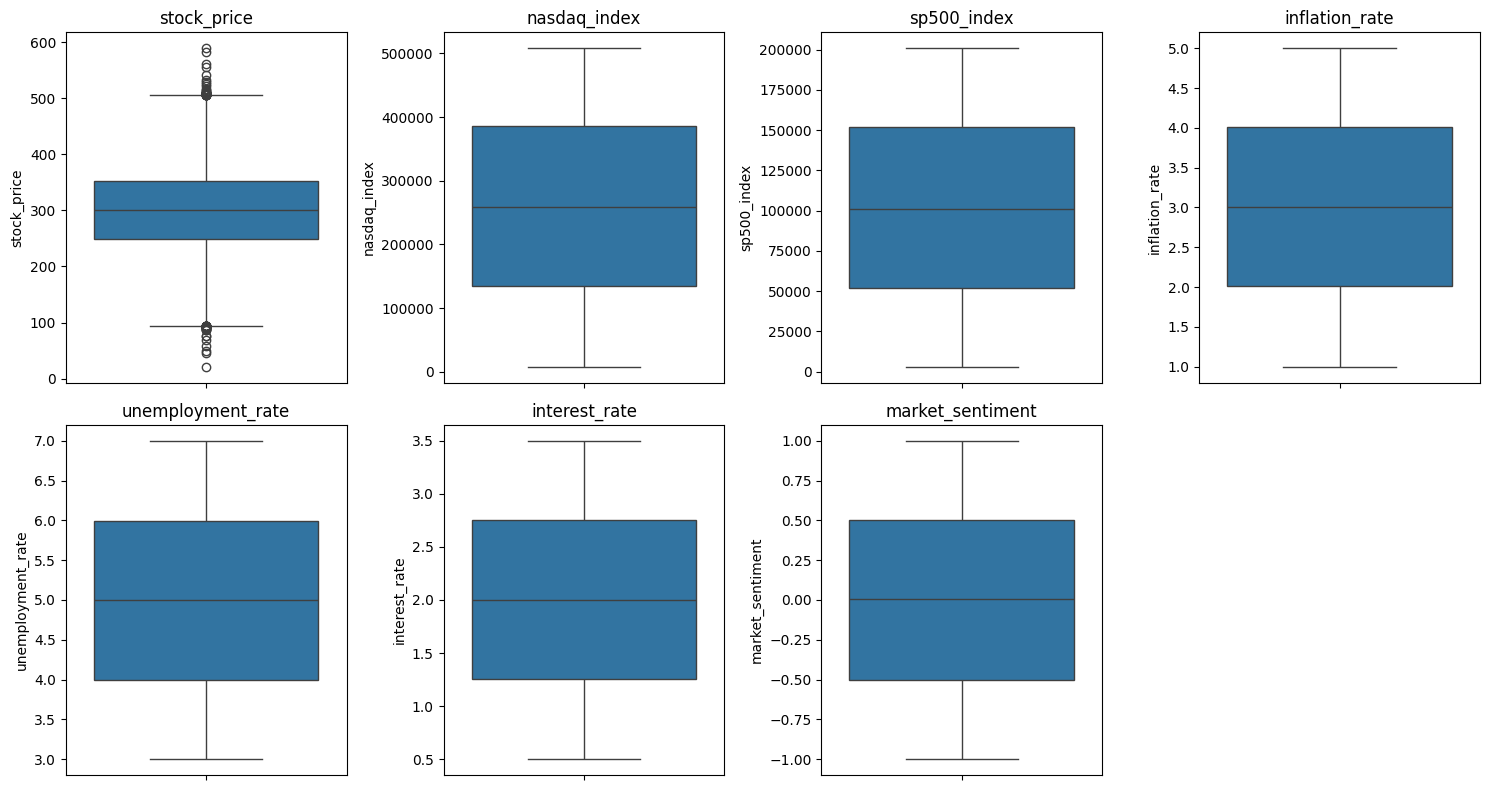

In [28]:
#generating boxplots for all numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_cols = ['stock_price', 'nasdaq_index', 'sp500_index',
                'inflation_rate', 'unemployment_rate',
                'interest_rate', 'market_sentiment']

# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplots for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns layout
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


From the boxplots, it is evident that outliers are present only in the stock_price column. Therefore, we will use the IQR method to handle and cap these outliers appropriately.

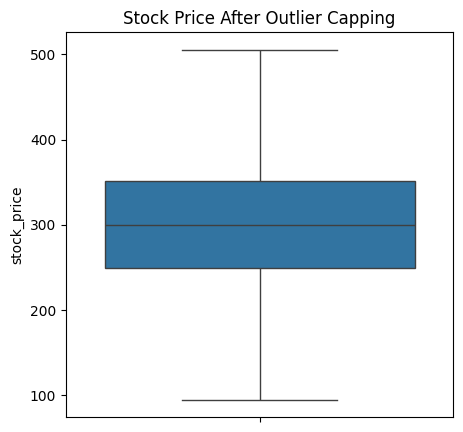

In [29]:
# Calculate Q1, Q3, and IQR for 'stock_price'
Q1 = df['stock_price'].quantile(0.25)
Q3 = df['stock_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['stock_price'] = df['stock_price'].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(5, 5))
sns.boxplot(y=df['stock_price'])
plt.title('Stock Price After Outlier Capping')
plt.show()

In [30]:
# #statistical anlaysis
# df.describe()

# **Exploratory Data Anlaysis**

In [31]:
# #trend, sesaonality , residual for stock_price column
# #Assuming hourly data, we can try period = 24 (daily seasonality)
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(df['stock_price'], model='additive', period=24)

# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# # Plotting
# plt.figure(figsize=(15,12))

# plt.subplot(4,1,1)
# plt.plot(df['stock_price'], label='Original', color='blue')
# plt.title('Original Stock Price')
# plt.legend()

# plt.subplot(4,1,2)
# plt.plot(trend, label='Trend', color='orange')
# plt.title('Trend Component')
# plt.legend()

# plt.subplot(4,1,3)
# plt.plot(seasonal, label='Seasonality', color='green')
# plt.title('Seasonal Component')
# plt.legend()

# plt.subplot(4,1,4)
# plt.plot(residual, label='Residual', color='red')
# plt.title('Residual Component')
# plt.legend()

# plt.tight_layout()
# plt.show()

Period is set to 24 for hourly data with daily seasonality.

If you want weekly seasonality, set period=24*5 (5 trading days).

For monthly trends, use period=24* 5 *4 (approx 4 weeks).

here the dataset follows the Upward Linear Trend and non-seasonal

In [32]:
# #Distribution plots (Histogram)
# numeric_cols = ['stock_price','nasdaq_index','sp500_index','inflation_rate','unemployment_rate','interest_rate','market_sentiment']

# for col in numeric_cols:
#     plt.figure(figsize=(8, 5))
#     df[col].hist(bins=30)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

In [33]:
# # Scatter Plot: Stock Price vs NASDAQ
# plt.figure(figsize=(7,5))
# sns.regplot(x='nasdaq_index', y='stock_price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
# plt.title('Relationship: Stock Price vs NASDAQ Index')
# plt.xlabel('NASDAQ Index')
# plt.ylabel('Stock Price')
# plt.show()

The Stock Price shows a strong positive relationship with the NASDAQ Index, meaning that as the NASDAQ Index increases, the Stock Price also tends to rise.

In [34]:
# #Scatter Plot: Stock Price vs S&P 500
# plt.figure(figsize=(7,5))
# sns.regplot(x='sp500_index', y='stock_price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
# plt.title('Relationship: Stock Price vs S&P 500 Index')
# plt.xlabel('S&P 500 Index')
# plt.ylabel('Stock Price')
# plt.show()

The Stock Price rises with respect to the S&P 500 Index, indicating a strong positive correlation between them. As the S&P 500 increases, the Stock Price also tends to move upward.

In [35]:
# # Correlation Heatmap
# plt.figure(figsize=(10, 8))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Heatmap of Numeric Features')
# plt.show()

by above correlation mapping we can understand that the nasadq_index and sp500_index having a very strong positive relationships.

nasdaq_index has 0.96
Strong positive relation

sp500_index has 0.96
Strong positive relation

Our stock price is highly market-driven, tightly coupled with major indices like NASDAQ and S&P 500.

This means when the NASDAQ or S&P 500 rises, your stock price also increases, and vice versa.

nasdaq_index and sp500_index are sufficient and optimal starting predictors for model fitting and forecasting stock_price.

In [36]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt

# data = df[['stock_price']].values

# train_size = int(len(data) * 0.7)
# val_size = int(len(data) * 0.15)
# test_size = len(data) - train_size - val_size

# train_data_raw = data[:train_size]
# val_data_raw = data[train_size:train_size + val_size]
# test_data_raw = data[train_size + val_size:]

# scaler = MinMaxScaler(feature_range=(0, 1))
# train_scaled = scaler.fit_transform(train_data_raw)
# val_scaled = scaler.transform(val_data_raw)
# test_scaled = scaler.transform(test_data_raw)

# time_step = 90

# full_val_data = np.concatenate((train_scaled[-time_step:], val_scaled))
# full_test_data = np.concatenate((val_scaled[-time_step:], test_scaled))

# def create_sequences(data_array, time_step=90):
#     X, y = [], []
#     for i in range(time_step, len(data_array)):
#         X.append(data_array[i - time_step:i, 0])
#         y.append(data_array[i, 0])
#     return np.array(X), np.array(y)

# X_train, y_train = create_sequences(train_scaled, time_step)
# X_val, y_val = create_sequences(full_val_data, time_step)
# X_test, y_test = create_sequences(full_test_data, time_step)

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# model = Sequential()
# model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
# model.add(Dropout(0.3))
# model.add(LSTM(100, return_sequences=False))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='linear'))
# model.compile(optimizer='nadam', loss='mean_squared_error')

# early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# history = model.fit(
#     X_train,
#     y_train,
#     batch_size=16,
#     epochs=100,
#     validation_data=(X_val, y_val),
#     callbacks=[early_stop],
#     verbose=1
# )

# predicted_stock_price_scaled = model.predict(X_test)

# # Fix: Pad predicted and actual values with zeros to match scaler's 3-feature input shape
# pad_pred = np.zeros((predicted_stock_price_scaled.shape[0], data.shape[1]))
# pad_pred[:, 0] = predicted_stock_price_scaled[:, 0]
# predicted_stock_price = scaler.inverse_transform(pad_pred)[:, 0]

# pad_actual = np.zeros((y_test.shape[0], data.shape[1]))
# pad_actual[:, 0] = y_test
# y_test_actual_unscaled = scaler.inverse_transform(pad_actual)[:, 0]

# mae = mean_absolute_error(y_test_actual_unscaled, predicted_stock_price)
# rmse = np.sqrt(mean_squared_error(y_test_actual_unscaled, predicted_stock_price))
# print("MAE:", mae)
# print("RMSE:", rmse)

# plot_start_index = train_size + val_size

# plt.figure(figsize=(15, 6))
# plt.plot(df.index[plot_start_index:plot_start_index + len(y_test_actual_unscaled)], y_test_actual_unscaled, label='Actual Stock Price')
# plt.plot(df.index[plot_start_index:plot_start_index + len(predicted_stock_price)], predicted_stock_price, label='Predicted Stock Price')
# plt.title('Stock Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.grid(True)
# plt.show()

# # MAE: 5.120546577276742
# # RMSE: 7.080567167409096


In [37]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt

# data = df[['stock_price']].values

# train_size = int(len(data) * 0.7)
# val_size = int(len(data) * 0.15)
# test_size = len(data) - train_size - val_size

# train_data_raw = data[:train_size]
# val_data_raw = data[train_size:train_size + val_size]
# test_data_raw = data[train_size + val_size:]

# scaler = MinMaxScaler(feature_range=(0, 1))
# train_scaled = scaler.fit_transform(train_data_raw)
# val_scaled = scaler.transform(val_data_raw)
# test_scaled = scaler.transform(test_data_raw)

# time_step = 90

# full_val_data = np.concatenate((train_scaled[-time_step:], val_scaled))
# full_test_data = np.concatenate((val_scaled[-time_step:], test_scaled))

# def create_sequences(data_array, time_step=90):
#     X, y = [], []
#     for i in range(time_step, len(data_array)):
#         X.append(data_array[i - time_step:i, 0])
#         y.append(data_array[i, 0])
#     return np.array(X), np.array(y)

# X_train, y_train = create_sequences(train_scaled, time_step)
# X_val, y_val = create_sequences(full_val_data, time_step)
# X_test, y_test = create_sequences(full_test_data, time_step)

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_step, 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.3))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='linear'))
# model.compile(optimizer='nadam', loss='mean_squared_error')

# early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# history = model.fit(
#     X_train,
#     y_train,
#     batch_size=16,
#     epochs=100,
#     validation_data=(X_val, y_val),
#     callbacks=[early_stop],
#     verbose=1
# )

# predicted_stock_price_scaled = model.predict(X_test)

# pad_pred = np.zeros((predicted_stock_price_scaled.shape[0], data.shape[1]))
# pad_pred[:, 0] = predicted_stock_price_scaled[:, 0]
# predicted_stock_price = scaler.inverse_transform(pad_pred)[:, 0]

# pad_actual = np.zeros((y_test.shape[0], data.shape[1]))
# pad_actual[:, 0] = y_test
# y_test_actual_unscaled = scaler.inverse_transform(pad_actual)[:, 0]

# mae = mean_absolute_error(y_test_actual_unscaled, predicted_stock_price)
# rmse = np.sqrt(mean_squared_error(y_test_actual_unscaled, predicted_stock_price))
# print("MAE:", mae)
# print("RMSE:", rmse)

# plot_start_index = train_size + val_size

# plt.figure(figsize=(15, 6))
# plt.plot(df.index[plot_start_index:plot_start_index + len(y_test_actual_unscaled)], y_test_actual_unscaled, label='Actual Stock Price')
# plt.plot(df.index[plot_start_index:plot_start_index + len(predicted_stock_price)], predicted_stock_price, label='Predicted Stock Price')
# plt.title('CNN-LSTM Stock Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.grid(True)
# plt.show()

# MAE: 52.80975552742227
# RMSE: 59.93357688139426

In [38]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt

# df2 = df.copy()
# df2['stock_ret'] = df2['stock_price'].pct_change().fillna(0)
# df2['nasdaq_ret'] = df2['nasdaq_index'].pct_change().fillna(0)
# df2['sp500_ret'] = df2['sp500_index'].pct_change().fillna(0)
# df2['stock_sma'] = df2['stock_price'].rolling(window=10, min_periods=1).mean()
# df2['stock_std'] = df2['stock_price'].rolling(window=10, min_periods=1).std().fillna(0)
# features = ['stock_price','stock_ret','stock_sma','stock_std','nasdaq_ret','sp500_ret']
# data = df2[features].values

# train_size = int(len(data) * 0.7)
# val_size = int(len(data) * 0.15)
# test_size = len(data) - train_size - val_size

# train_data_raw = data[:train_size]
# val_data_raw = data[train_size:train_size + val_size]
# test_data_raw = data[train_size + val_size:]

# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit(train_data_raw)
# train_scaled = scaler.transform(train_data_raw)
# val_scaled = scaler.transform(val_data_raw)
# test_scaled = scaler.transform(test_data_raw)

# time_step = 90

# full_val_data = np.concatenate((train_scaled[-time_step:], val_scaled))
# full_test_data = np.concatenate((val_scaled[-time_step:], test_scaled))

# def create_sequences_multi(arr, time_step=90):
#     X, y = [], []
#     for i in range(time_step, len(arr)):
#         X.append(arr[i - time_step:i])
#         y.append(arr[i, 0])
#     return np.array(X), np.array(y)

# X_train, y_train = create_sequences_multi(train_scaled, time_step)
# X_val, y_val = create_sequences_multi(full_val_data, time_step)
# X_test, y_test = create_sequences_multi(full_test_data, time_step)

# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
# model.add(Dropout(0.3))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='linear'))
# model.compile(optimizer='nadam', loss='mean_squared_error')

# es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_val, y_val), callbacks=[es], verbose=1)

# pred_scaled = model.predict(X_test)
# pad_pred = np.zeros((pred_scaled.shape[0], data.shape[1]))
# pad_pred[:, 0] = pred_scaled[:, 0]
# predicted = scaler.inverse_transform(pad_pred)[:, 0]

# pad_actual = np.zeros((y_test.shape[0], data.shape[1]))
# pad_actual[:, 0] = y_test
# actual = scaler.inverse_transform(pad_actual)[:, 0]

# mae = mean_absolute_error(actual, predicted)
# rmse = np.sqrt(mean_squared_error(actual, predicted))
# print("MAE:", mae)
# print("RMSE:", rmse)

# plot_start_index = train_size + val_size
# plt.figure(figsize=(15,6))
# plt.plot(df.index[plot_start_index:plot_start_index + len(actual)], actual, label='Actual')
# plt.plot(df.index[plot_start_index:plot_start_index + len(predicted)], predicted, label='Predicted')
# plt.legend()
# plt.show()

# MAE: 7.064824623911323
# RMSE: 9.233511347397492

In [39]:
# features = ['nasdaq_index', 'sp500_index', 'inflation_rate', 'unemployment_rate', 'interest_rate', 'market_sentiment']

# # Target: predict returns instead of raw stock price
# df['returns'] = df['stock_price'].pct_change()
# df['lag1'] = df['stock_price'].shift(1)
# df['rolling7'] = df['stock_price'].rolling(7).mean()
# df.fillna(method='bfill', inplace=True)

# features += ['lag1', 'rolling7']
# target = 'returns'

# # -----------------------------
# # Scaling
# # -----------------------------
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df[features + [target]])

# # -----------------------------
# # Convert to sequences
# # -----------------------------
# def create_sequences(data, time_step=20):
#     X, y = [], []
#     for i in range(time_step, len(data)):
#         X.append(data[i-time_step:i, :-1])
#         y.append(data[i, -1])
#     return np.array(X), np.array(y)

# time_step = 20
# X, y = create_sequences(scaled_data, time_step)

# # Train-test split
# split = int(0.8 * len(X))
# X_train, X_test = X[:split], X[split:]
# y_train, y_test = y[:split], y[split:]

# # -----------------------------
# # Build LSTM Model
# # -----------------------------
# model = Sequential()
# model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(1))

# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train model
# es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[es], verbose=1)

# # -----------------------------
# # Predict on test set
# # -----------------------------
# y_pred = model.predict(X_test)

# # Inverse scaling for returns
# scaled_y_test = np.zeros((len(y_test), len(features)+1))
# scaled_y_test[:, -1] = y_test
# y_test_inv = scaler.inverse_transform(scaled_y_test)[:, -1]

# scaled_y_pred = np.zeros((len(y_pred), len(features)+1))
# scaled_y_pred[:, -1] = y_pred[:, 0]
# y_pred_inv = scaler.inverse_transform(scaled_y_pred)[:, -1]

# # Convert returns back to stock prices
# last_price = df['stock_price'].iloc[split + time_step - 1]
# actual_prices = [last_price]
# predicted_prices = [last_price]

# for r_actual, r_pred in zip(y_test_inv, y_pred_inv):
#     last_price_actual = actual_prices[-1] * (1 + r_actual)
#     last_price_pred = predicted_prices[-1] * (1 + r_pred)
#     actual_prices.append(last_price_actual)
#     predicted_prices.append(last_price_pred)

# # Remove first duplicated price
# actual_prices = actual_prices[1:]
# predicted_prices = predicted_prices[1:]

# # -----------------------------
# # Plot results
# # -----------------------------
# plt.figure(figsize=(12,6))
# plt.plot(df.index[split+time_step:], actual_prices, color='blue', label='Actual Price')
# plt.plot(df.index[split+time_step:], predicted_prices, color='red', label='Predicted Price')
# plt.title('Apple Stock Price Prediction (LSTM on Returns)')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

# # -----------------------------
# # Forecast next 30 business days
# # -----------------------------
# def forecast_next_days(model, data, scaler, last_price, time_step=20, future_days=30):
#     temp_input = list(data[-time_step:, :])
#     future_preds = []
#     for _ in range(future_days):
#         x_input = np.array(temp_input[-time_step:])[:, :-1].reshape(1, time_step, len(features))
#         yhat = model.predict(x_input)[0,0]
#         temp_row = list(x_input[0, -1, :]) + [yhat]
#         temp_input.append(temp_row)
#         future_preds.append(yhat)

#     # Inverse scale returns
#     scaled_future = np.zeros((future_days, len(features)+1))
#     scaled_future[:, -1] = future_preds
#     future_returns = scaler.inverse_transform(scaled_future)[:, -1]

#     # Convert returns to prices
#     future_prices = []
#     price = last_price
#     for r in future_returns:
#         price = price * (1 + r)
#         future_prices.append(price)
#     return future_prices

# future_prices = forecast_next_days(model, scaled_data, scaler, df['stock_price'].iloc[-1], time_step, 30)

# # Future dates
# future_dates = pd.bdate_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)
# forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Stock_Price': future_prices})
# forecast_df.set_index('Date', inplace=True)
# print(forecast_df)

# # Plot future forecast
# plt.figure(figsize=(12,6))
# plt.plot(df['stock_price'][-60:], label='Last 60 Actual Prices')
# plt.plot(forecast_df.index, forecast_df['Predicted_Stock_Price'], label='Next 30-Day Forecast', color='red')
# plt.title('Apple Stock Price 30-Day Forecast')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

In [40]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error
# import warnings
# warnings.filterwarnings("ignore")

# # -----------------------------
# # Ensure proper DateTime index and frequency
# # -----------------------------
# df = df.asfreq('B')  # business day frequency
# df.fillna(method='ffill', inplace=True)

# # -----------------------------
# # Exogenous features and lagged returns
# # -----------------------------
# # Assume exog_features list exists
# exog_features = ['nasdaq_index', 'sp500_index', 'inflation_rate', 'unemployment_rate', 'interest_rate', 'market_sentiment', 'lag1_return', 'lag2_return']

# # -----------------------------
# # Train-test split
# # -----------------------------
# train_size = int(0.8 * len(df))
# train, test = df.iloc[:train_size], df.iloc[train_size:]

# # -----------------------------
# # Automatic parameter tuning (grid search on small SARIMAX orders)
# # -----------------------------
# import itertools

# p = d = q = range(0, 2)
# P = D = Q = range(0, 2)
# s = [5]  # weekly seasonality (5 business days)

# best_aic = np.inf
# best_order = None
# best_seasonal_order = None

# for order in itertools.product(p,d,q):
#     for seasonal_order in itertools.product(P,D,Q,s):
#         try:
#             model = SARIMAX(
#                 endog=train['log_return'],
#                 exog=train[exog_features],
#                 order=order,
#                 seasonal_order=seasonal_order,
#                 enforce_stationarity=False,
#                 enforce_invertibility=False
#             )
#             results = model.fit(disp=False)
#             if results.aic < best_aic:
#                 best_aic = results.aic
#                 best_order = order
#                 best_seasonal_order = seasonal_order
#         except:
#             continue

# print(f"Best SARIMAX order: {best_order}, Seasonal order: {best_seasonal_order}, AIC: {best_aic:.2f}")

# # -----------------------------
# # Fit SARIMAX with best parameters
# # -----------------------------
# model = SARIMAX(
#     endog=train['log_return'],
#     exog=train[exog_features],
#     order=best_order,
#     seasonal_order=best_seasonal_order,
#     enforce_stationarity=False,
#     enforce_invertibility=False
# )
# sarimax_model = model.fit(disp=False)
# print(sarimax_model.summary())

# # -----------------------------
# # Forecast on test set
# # -----------------------------
# y_pred_log_return = sarimax_model.get_forecast(steps=len(test), exog=test[exog_features]).predicted_mean

# # Convert log returns to stock prices
# last_train_price = df['stock_price'].iloc[train_size-1]
# predicted_prices = [last_train_price]
# for r in y_pred_log_return:
#     r = np.clip(r, -0.02, 0.02)  # clip extreme daily returns
#     predicted_prices.append(predicted_prices[-1] * np.exp(r))
# predicted_prices = predicted_prices[1:]
# actual_prices = df['stock_price'][train_size:]

# # -----------------------------
# # Calculate RMSE and RME
# # -----------------------------
# rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
# rme = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

# print(f"RMSE: {rmse:.4f}")
# print(f"RME (%): {rme:.2f}%")

# # -----------------------------
# # Plot actual vs predicted
# # -----------------------------
# plt.figure(figsize=(12,6))
# plt.plot(actual_prices.index, actual_prices, label='Actual Price')
# plt.plot(actual_prices.index, predicted_prices, label='Predicted Price', color='red')
# plt.title('SARIMAX Forecast on Log Returns (Converted to Price)')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

# # -----------------------------
# # Forecast next 30 business days
# # -----------------------------
# future_exog = pd.DataFrame([df[exog_features].iloc[-1].values]*30, columns=exog_features)
# future_log_return = sarimax_model.get_forecast(steps=30, exog=future_exog).predicted_mean

# # Convert to stock prices
# future_prices = []
# last_price = df['stock_price'].iloc[-1]
# for r in future_log_return:
#     r = np.clip(r, -0.02, 0.02)
#     last_price = last_price * np.exp(r)
#     future_prices.append(last_price)

# future_dates = pd.bdate_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)
# forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Stock_Price': future_prices})
# forecast_df.set_index('Date', inplace=True)
# print(forecast_df)

# # Plot future forecast
# plt.figure(figsize=(12,6))
# plt.plot(df['stock_price'][-60:], label='Last 60 Actual Prices')
# plt.plot(forecast_df.index, forecast_df['Predicted_Stock_Price'], label='Next 30-Day Forecast', color='red')
# plt.title('Apple Stock Price 30-Day SARIMAX Forecast')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()


# **Model Training**

c:\Users\Sahil\anaconda3\envs\torch_gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sahil\anaconda3\envs\torch_gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sahil\anaconda3\envs\torch_gpu\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Epoch 1/50


c:\Users\Sahil\anaconda3\envs\torch_gpu\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1011/1011 ━━━━━━━━━━━━━━━━━━━━ 71s 68ms/step - loss: 0.0024 - val_loss: 9.7417e-04
Epoch 2/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 47s 46ms/step - loss: 0.0024 - val_loss: 9.5223e-04
Epoch 3/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - loss: 0.0023 - val_loss: 9.6067e-04
Epoch 4/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - loss: 0.0023 - val_loss: 9.8430e-04
Epoch 5/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - loss: 0.0023 - val_loss: 9.5555e-04
Epoch 6/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - loss: 0.0023 - val_loss: 9.6339e-04
Epoch 7/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - loss: 0.0023 - val_loss: 9.5233e-04
Epoch 8/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 9/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 10/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - loss: 0.0023 - val_loss: 9.4953e-04
Epoch 11/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - loss: 0.0023 - val_

C:\Users\Sahil\AppData\Local\Temp\ipykernel_3604\470881334.py:82: RuntimeWarning: divide by zero encountered in divide
  rme = np.mean(np.abs((actual_test - hybrid_pred) / actual_test)) * 100


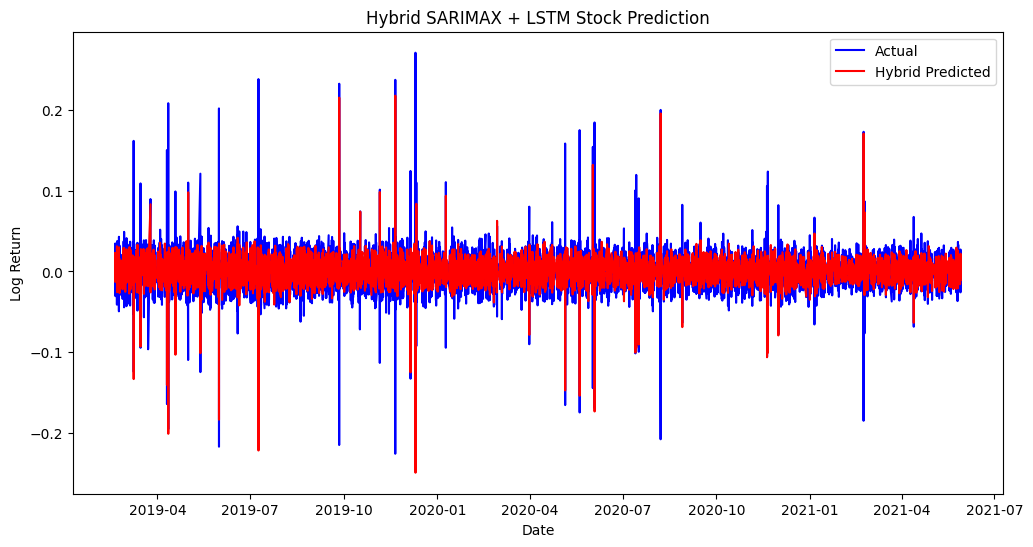

In [42]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Compute logarithmic returns to stabilize variance
df['log_return'] = np.log1p(df['stock_price'].pct_change())
df['log_return'] = df['log_return'].bfill()  

# Define features (external regressors) and target variable
features = ['nasdaq_index', 'sp500_index', 'inflation_rate', 'unemployment_rate', 'interest_rate', 'market_sentiment']
target = 'log_return'

# Define SARIMAX model parameters
sarimax_order = (1, 0, 1)
seasonal_order = (0, 0, 0, 5)

# External features for SARIMAX
exog = df[features]

# Train SARIMAX model on log returns with exogenous features
sarimax_model = SARIMAX(df[target], order=sarimax_order, seasonal_order=seasonal_order, exog=exog)
sarimax_fit = sarimax_model.fit(disp=False)

# Predict using SARIMAX model
sarimax_pred = sarimax_fit.predict(start=0, end=len(df)-1, exog=exog)

# Calculate residuals (error between actual and predicted log returns)
residuals = (df[target] - sarimax_pred.values).astype(np.float32)

# Scale residuals between -1 and 1 for LSTM training
scaler = MinMaxScaler(feature_range=(-1, 1))
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Function to create time-step sequences for LSTM input
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create sequences of residuals for LSTM
time_step = 60
X, y = create_sequences(residuals_scaled, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

# Compile and train LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
history = lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Predict residuals using LSTM
y_pred_lstm_scaled = lstm_model.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)

# Get SARIMAX predictions for the same test period
sarimax_test_pred = sarimax_pred.values[-len(y_test):]

# Combine SARIMAX predictions with LSTM residual predictions to form hybrid forecast
hybrid_pred = sarimax_test_pred + y_pred_lstm.flatten()
actual_test = df[target].values[-len(y_test):]

# Evaluate hybrid model performance
rmse = np.sqrt(mean_squared_error(actual_test, hybrid_pred))
rme = np.mean(np.abs((actual_test - hybrid_pred) / actual_test)) * 100

print("Hybrid SARIMAX+LSTM RMSE:", rmse)
print("Hybrid SARIMAX+LSTM RME (%):", rme)

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], actual_test, label='Actual', color='blue')
plt.plot(df.index[-len(y_test):], hybrid_pred, label='Hybrid Predicted', color='red')
plt.title('Hybrid SARIMAX + LSTM Stock Prediction')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()




In [44]:
future_days = 30
last_residuals = residuals_scaled[-time_step:].reshape(1, time_step, 1)
future_exog = df[features].iloc[-1:].values

future_sarimax = sarimax_fit.forecast(steps=future_days, exog=np.repeat(future_exog, future_days, axis=0))

future_pred = []
temp_resid_input = last_residuals.copy()
for i in range(future_days):
    lstm_resid = lstm_model.predict(temp_resid_input)[0,0]
    pred = future_sarimax.iloc[i] + scaler.inverse_transform([[lstm_resid]])[0,0]
    future_pred.append(pred)
    temp_resid_input = np.append(temp_resid_input[:,1:,:], [[[lstm_resid]]], axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

c:\Users\Sahil\anaconda3\envs\torch_gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Sahil\anaconda3\envs\torch_gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1

Calculated Bias: -0.00029637952276380153
                  Date  Forecasted_Price
0  2021-05-29 20:00:00        502.171843
1  2021-05-30 20:00:00        500.958952
2  2021-05-31 20:00:00        501.579519
3  2021-06-01 20:00:00        499.818670
4  2021-06-02 20:00:00        509.234715
5  2021-06-03 20:00:00        502.363228
6  2021-06-04 20:00:00        512.229585
7  2021-06-05 20:00:00        520.107236
8  2021-06-06 20:00:00        521.138224
9  2021-06-07 20:00:00        521.150078
10 2021-06-08 20:00:00        521.191755
11 2021-06-09 20:00:00        515.472478
12 2021-06-10 20:00:00        520.063986
13 2021-06-11 20:00:00        520.941100
14 2021-06-12 20:00:00        524.128435
15 2021-06-13 20:00:00        524.551960
16 2021-06-14 20:00:00        523.031738
17 2021-06-15 20:00:00        511.537453
18 2021-06-16 20:00:00        517.627553
19 2021-06-17 20:00:00        514.315537
20 2021-06-18 20:00:00        512.828749
21 2021-06-19 20:00:00        513.308616
22 2021-06-20 20

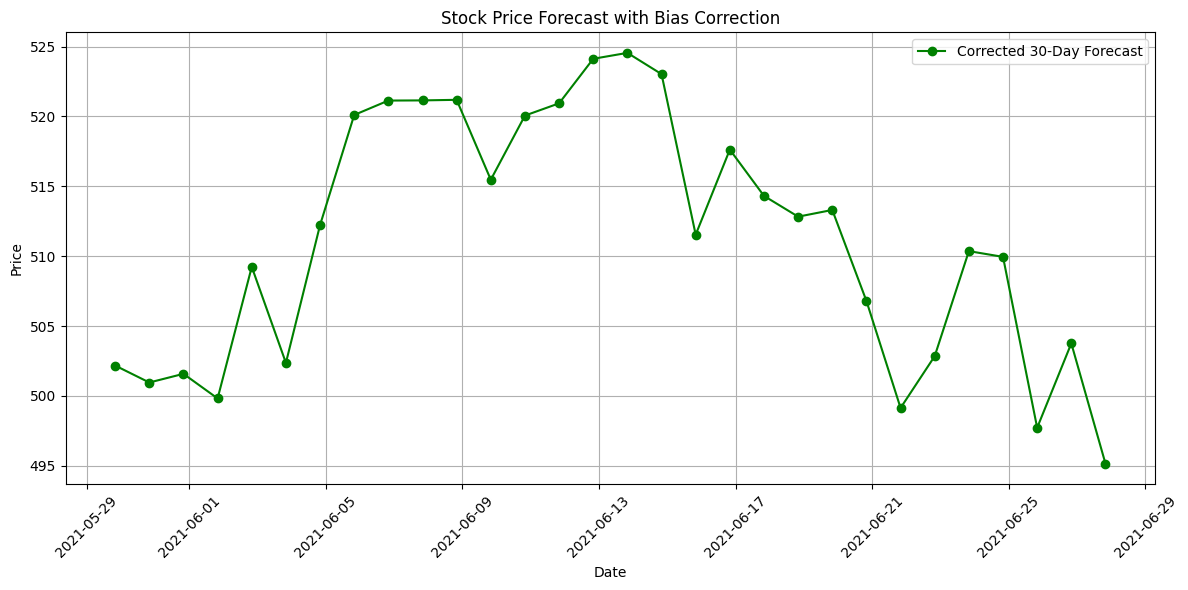

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


y_validation_actual = actual_test
validation_predictions = hybrid_pred

# Calculate the mean error (the bias)
bias = np.mean(y_validation_actual - validation_predictions)
print(f"Calculated Bias: {bias}")

# --- Step 2: Apply the Bias Correction to Your Future Forecast ---

# Assume 'future_pred' is the raw output from your model for the next 30 days
# future_pred = model.forecast(steps=30) # This is your original forecast
future_pred_raw = np.random.randn(30) * 0.01 - 0.0005 # Example of a biased forecast

# Apply the correction
corrected_log_return_forecast = future_pred_raw + bias

# --- Step 3: Convert Corrected Log Returns to Prices (Your existing code) ---

last_price = df['stock_price'].iloc[-1]
df_index_last = df.index[-1]

price_forecast = [last_price]
for r in corrected_log_return_forecast:
    next_price = price_forecast[-1] * np.exp(r)
    price_forecast.append(next_price)

price_forecast = price_forecast[1:]

# Generate forecast dates
forecast_dates = pd.date_range(df_index_last + pd.Timedelta(days=1),
                               periods=len(price_forecast),
                               freq='D')
# Create a DataFrame for forecasted prices
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Price': price_forecast
})

# Show forecasted prices with dates
print(forecast_df)

# Plotting the results
plt.figure(figsize=(12,6))
# plt.plot(df.index, df['stock_price'], label='Historical Price') # Plot your historical data
plt.plot(forecast_dates, price_forecast, label='Corrected 30-Day Forecast', color='green', marker='o')
plt.title('Stock Price Forecast with Bias Correction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df.tail()


,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment,returns,lag1_return,returns_smooth,lag2_return,log_price,log_return
timestamp,,,,,,,,,,,,,
2021-05-24 04:00:00,500.099198,0.998720,0.998999,0.941716,0.256072,0.134681,0.159784,0.025357,0.008379,0.005137,-0.018532,6.214806,0.021943
2021-05-25 04:00:00,488.593199,0.999155,0.999136,0.641134,0.345393,0.806160,0.688349,-0.015012,-0.012888,-0.007614,0.004964,6.191530,-0.023276
2021-05-26 04:00:00,487.549865,0.999453,0.999530,0.017619,0.494784,0.898403,0.382177,-0.017485,0.027977,-0.008392,-0.036730,6.189393,-0.002138
2021-05-27 04:00:00,502.133241,0.999718,0.999582,0.820272,0.594960,0.371365,0.963825,0.006693,0.000387,0.000891,-0.004417,6.218866,0.029473
2021-05-28 04:00:00,501.412686,0.999984,0.999665,0.450478,0.109237,0.748076,0.725052,0.019656,0.002831,0.001342,-0.018638,6.217429,-0.001436
